In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [3]:
hf = h5py.File("sampled_jets.h5","r")

In [71]:
ojs = hf.get("original_jets")
sjs = hf.get("sampled_jets")

In [12]:
np.sum(ojs,axis=1)

array([[  1.        , -10.55187257, 155.42264527],
       [  1.        ,  48.74402391, 154.9539    ],
       [  1.        , -35.05657075, 157.09757086],
       ...,
       [  1.        , -22.88794196, 159.67264664],
       [  1.        ,   6.5073224 , 164.81652102],
       [  1.        , -11.88796483, 147.9967661 ]])

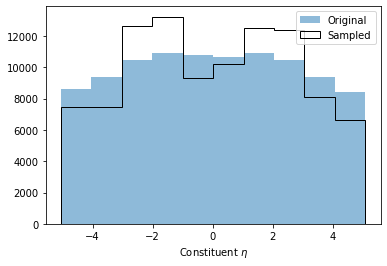

In [74]:
n,b,_=plt.hist(ojs[:,:,1].flatten(),label="Original",alpha=0.5)
plt.hist(sjs[0][:,:,1].flatten(),label="Sampled",bins=b,histtype="step",color="black")
plt.xlabel("Constituent $\eta$")
plt.legend()

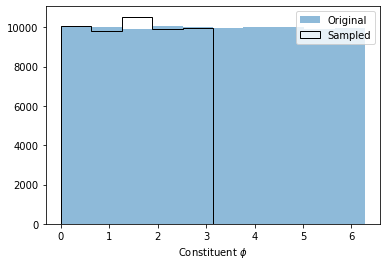

In [75]:
n,b,_=plt.hist(ojs[:,:,2].flatten(),label="Original",alpha=0.5)
plt.hist(sjs[0][:,:,2].flatten(),label="Sampled",bins=b,histtype="step",color="black")
plt.xlabel("Constituent $\phi$")
plt.legend()

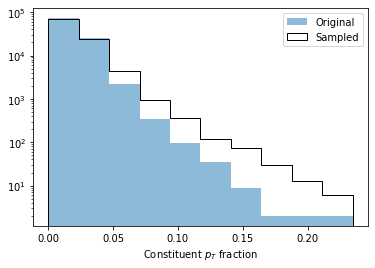

In [76]:
n,b,_=plt.hist(ojs[:,:,0].flatten(),label="Original",alpha=0.5)
plt.hist(sjs[0][:,:,0].flatten(),label="Sampled",bins=b,histtype="step",color="black")
plt.xlabel("Constituent $p_T$ fraction")
plt.yscale("log")
plt.legend()

In [77]:
def event_mass(myinput):
    ms = []
    for i in range(len(myinput)):
        px = np.sum(myinput[i,:,0].flatten()*np.cos(myinput[i,:,2].flatten()))
        py = np.sum(myinput[i,:,0].flatten()*np.sin(myinput[i,:,2].flatten()))
        pz = np.sum(myinput[i,:,0].flatten()*np.sinh(myinput[i,:,1].flatten()))
        E = np.sum(myinput[i,:,0].flatten()*np.cosh(myinput[i,:,1].flatten()))
        ms += [(E**2-px*px-py*py-pz*pz)**0.5]
    return np.array(ms)

event_mass_oj = event_mass(ojs)
event_mass_sj = event_mass(sjs[0])

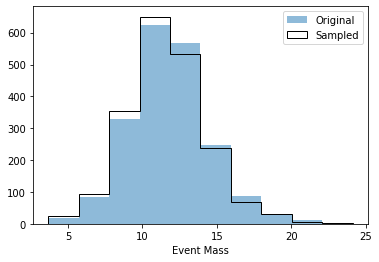

In [85]:
n,b,_=plt.hist(event_mass_oj,label="Original",alpha=0.5)
plt.hist(event_mass_sj,label="Sampled",bins=b,histtype="step",color="black")
plt.xlabel("Event Mass")
plt.legend()

In [81]:
def MET(myinput):
    ms = []
    for i in range(len(myinput)):
        px = np.sum(myinput[i,:,0].flatten()*np.cos(myinput[i,:,2].flatten()))
        py = np.sum(myinput[i,:,0].flatten()*np.sin(myinput[i,:,2].flatten()))
        ms += [px**2+py**2]
    return np.array(ms)

MET_oj = MET(ojs)
MET_sj = MET(sjs[0])

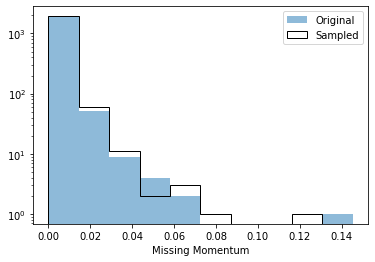

In [83]:
n,b,_=plt.hist(MET_oj,label="Original",alpha=0.5)
plt.hist(MET_sj,label="Sampled",bins=b,histtype="step",color="black")
plt.xlabel("Missing Momentum")
plt.legend()
plt.yscale("log")